In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [4]:
df = pd.read_csv('/Users/kelvinfoo/Desktop/AI Masters/TripAdvisor NLP/Data/cleaned_reviews.csv')
df.head()

,Unnamed: 0,Review,Rating,cleaned_reviews
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...
3,3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...
4,4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [15]:
X = df['cleaned_reviews']
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_test = X_test.reset_index(drop = True).to_frame()

In [17]:
def get_text_sentiment(text): 
    analyzer = SentimentIntensityAnalyzer()
    sentiment_dict = analyzer.polarity_scores(text)
    return sentiment_dict

X_test['sentiment_dict'] = X_test['cleaned_reviews'].map(get_text_sentiment)
X_test['compound'] = X_test['sentiment_dict'].apply(lambda x: x['compound'])

In [18]:
def get_sentiment_class(score):
    if (score <= 1.0 and score >= 0.80):
        return 5
    elif (score < 0.80 and score >= 0.40):
        return 4
    elif (score < 0.40 and score > -0.40):
        return 3
    elif (score <= -0.40 and score > -0.80):
        return 2
    elif (score <= -0.80 and score >= -1.00):
        return 1

X_test['predicted_rating'] = X_test['compound'].map(get_sentiment_class)

In [19]:
X_test['predicted_rating'].value_counts()

predicted_rating
5    3269
4     398
3     221
2     129
1      82
Name: count, dtype: int64

Precision: 0.7512120361996676
Recall: 0.4559648694803611
Accuracy: 0.4559648694803611


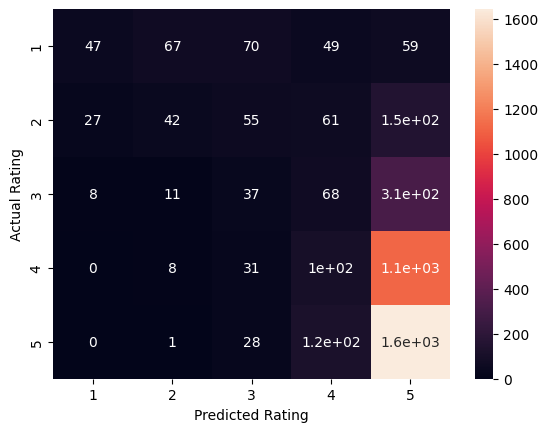

In [25]:
print(f"Precision: {precision_score(X_test['predicted_rating'], y_test, average = 'weighted')}")
print(f"Recall: {recall_score(X_test['predicted_rating'], y_test, average = 'weighted')}")
print(f"Accuracy: {accuracy_score(X_test['predicted_rating'], y_test)}")

cm = confusion_matrix(y_test, X_test['predicted_rating'], labels=[1, 2, 3, 4, 5])
sns.heatmap(cm, annot=True, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.show()